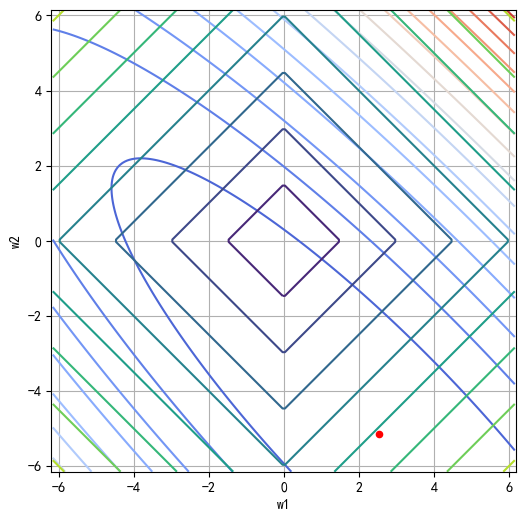

In [105]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge

plt.rcParams["font.sans-serif"] = ["KaiTi"]
plt.rcParams["axes.unicode_minus"] = False


def loss(beta):
    return np.sum((np.hstack((np.ones((10, 1)), X)) @ beta - y) ** 2, axis=0) / X.shape[0]


def l1_loss(w1, w2, lambd=0.01):
    return lambd * (np.abs(w1) + np.abs(w2))


def l2_loss(w1, w2, lambd=0.01):
    return lambd * (w1**2 + w2**2)


X = np.random.randint(0, 20, (10, 2))
y = np.random.randint(0, 100, (10, 1))
model = Lasso(alpha=0.01)
model.fit(X, y)
result = np.vstack([model.intercept_, model.coef_.reshape(-1, 1)])
z = loss(result) + l1_loss(result[1, 0], result[2, 0])

# 生成 w1 和 w2 的网格
left_bound = -max(abs(result[1, 0]), abs(result[2, 0])) - 1
w1 = np.linspace(left_bound, -left_bound, 200)
w2 = np.linspace(left_bound, -left_bound, 200)
w1_grid, w2_grid = np.meshgrid(w1, w2)
loss_vals = np.zeros_like(w1_grid)

for i in range(w1_grid.shape[1]):
    beta = np.hstack([w1_grid[:, i].reshape(-1, 1), w2.reshape(-1, 1)])
    beta = np.insert(beta, 0, result[0, 0], axis=1)
    loss_vals[:, i] = loss(beta.T)

# 计算 L1 和 L2 正则化损失
l1_vals = l1_loss(w1_grid, w2_grid)
l2_vals = l2_loss(w1_grid, w2_grid)

# 绘制损失函数
plt.figure(figsize=(6, 6))
# plt.contour(w1_grid, w2_grid, loss_vals, levels=np.arange(-1e3, 1e3, 100) + z, cmap="coolwarm")
plt.contour(w1_grid, w2_grid, loss_vals, levels=20, cmap="coolwarm")
plt.scatter(result[1, 0], result[2, 0], c="r", s=20)
plt.xlabel("w1")
plt.ylabel("w2")
plt.grid(True)
plt.axis("equal")
# 绘制 L1 正则化 (菱形)
plt.contour(w1_grid, w2_grid, l1_vals, levels=10)
# 绘制 L2 正则化 (圆形)
# plt.contour(w1_grid, w2_grid, l2_vals, levels=10)